In [49]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt

# **Проект по Вероятностным и статистическим моделям управления**
Выполнили: Алиев Хайрутдин, Джаварян Джамаль, Зубов Дмитрий, Курбанов Иван, Лухнев Игорь

Мы считаем, что развитый внутренний финансовый рынок является хорошим стимулом для роста Отечественной экономики, так как позволяет сократить объёмы вывоза капитала зарубеж, обеспечивает финансовую безопасность отечественных компаний, выводит сбережения населения из депозитов в реальный сектор, способствуя росту компаний, росту доходностей и, сооответственно, росту качества жизни населения в будущем.
 Скачаем базы данных с итогами торгов за год для акций, торгуемых на Московской бирже и имеющих тенденцию к росту:



In [50]:
afks_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AFKS.ME_weekly.csv'
agro_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AGRO.ME_weekly.csv'
alrs_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/ALRS.ME_weekly.csv'
chmf_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/CHMF.ME_weekly.csv'
dsky_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/DSKY.ME_weekly.csv'
five_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FIVE.ME_weekly.csv'
gazp_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/GAZP.ME_weekly.csv'
lnta_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LNTA.ME_weekly.csv'
mdmg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MDMG.ME_weekly.csv'
mgnt_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MGNT.ME_weekly.csv'
moex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MOEX.ME_weekly.csv'
mvid_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MVID.ME_weekly.csv'
nlmk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/NLMK.ME_weekly.csv'
pikk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/PIKK.ME_weekly.csv'
poly_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/POLY.ME_weekly.csv'
rtkm_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/RTKM.ME_weekly.csv'
sber_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/SBER.ME_weekly.csv'
tcsg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TCSG.ME_weekly.csv'
ttlk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TTLK.ME_weekly.csv'
yndx_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/YNDX.ME_weekly.csv'
imoex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/IMOEX.ME_weekly.csv'
laplas = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LaplaseTable.csv'
q_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/q_table.csv'

Запарсим данные в датафреймы

In [51]:
afks = pd.read_csv(afks_url)
agro = pd.read_csv(agro_url)
alrs = pd.read_csv(alrs_url)
chmf = pd.read_csv(chmf_url)
dsky = pd.read_csv(dsky_url)
five = pd.read_csv(five_url)
gazp = pd.read_csv(gazp_url)
lnta = pd.read_csv(lnta_url)
mgnt = pd.read_csv(mgnt_url)
moex = pd.read_csv(moex_url)
mvid = pd.read_csv(mvid_url)
nlmk = pd.read_csv(nlmk_url)
pikk = pd.read_csv(pikk_url)
poly = pd.read_csv(poly_url)
rtkm = pd.read_csv(rtkm_url)
sber = pd.read_csv(sber_url)
tcsg = pd.read_csv(tcsg_url)
ttlk = pd.read_csv(ttlk_url)
yndx = pd.read_csv(yndx_url)
imoex = pd.read_csv(imoex_url)

In [52]:
imoex = imoex.fillna(1)

Так как после второго пересмотра данные по доходностям мы имеем уже за разные периоды, введем параметры, ограничивающие период, за который мы рассматриваем доходности акций, также укажем, что первоначальная сумма для инвестиций - 1 млн рублей:

In [174]:
start_date = pd.to_datetime("2020-12-15")
# end_date = pd.to_datetime("2021-02-28")
# C_0 = 1000000
# # Первый пересмотр, строчку выше раскоментить при начале работы
# end_date = pd.to_datetime("2021-03-05")
# C_0 = C
# # Второй пересмотр портфеля
end_date = pd.to_datetime("2021-03-12")
C_0 = C

In [147]:
companies = [afks, agro, alrs, chmf, dsky, five, gazp, lnta, mgnt, moex, mvid, nlmk, pikk, poly, rtkm, sber, tcsg, ttlk, yndx, imoex]
labels = ["АФК Система", "РусАгро", "Алроса", "Северсталь", "Детский мир", "Х5 груп", "Газпром", "Лента", "Магнит", "Московская биржа", "МВидео", "НЛМК", "ПИК", "Polymetal", "РосТелеКом", "Сбербанк", "TCS Group", "Яндекс", "Индекс Мосбиржи"]

In [55]:
# fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(200, 200))
# for comp, pos, lab in zip(companies, itertools.product(range(6), range(3)), labels):
#     trend = []
#     for i in range(comp.shape[0]):
#         trend.append(comp.Close.iloc[:i].mean())
#     comp['Trend'] = trend
#     sns.lineplot(data=comp[['Date', 'Close', 'Trend']], legend=False, linewidth=4, ax=axes[pos[0], pos[1]])
#     axes[pos[0], pos[1]].set_title(lab, fontsize=72)

In [148]:
def covariation(X, Y):
    T = X.shape[0]
    X = X.to_numpy()
    Y = Y.to_numpy()
    # ((X - X.mean()) * (Y - Y.mean())).sum()/(T - 1)
    return np.cov(np.stack([X, Y]))[0, 1]

Для получения точечных оценок ожидаемой доходности активов мы применим модель регрессии, предложенной Шарпом, при этом необходимо проверить предположения модели, чтобы были основания доверять полученным оценкам. 

In [120]:
class linReg:
    prev_ksi_list = []
    ksi_list = []

    def __init__(self):
        self.w = -1
        self.mse = 0
        self.me = 0
        self.ksi_list = []
        self.mean_prev_covs = 0

    def fit(self, X, y):
        X = np.stack([np.ones_like(X), X])
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X, X.T)), X), y)
    
    def MSE(self, X, y):
        if type(self.w) == int:
            self.fit(X, y)
        self.mse = ((y - np.stack([np.ones_like(X), X]).T @ self.w)**2).sum()/len(y)

    def ME(self, X, y):
        if type(self.w) == int:
            self.fit(X, y)
        self.me = ((y - np.stack([np.ones_like(X), X]).T @ self.w)).sum()/len(y)
        return(self.me)
    
    def disp_ksi(self, X, y):
        covs = []
        self.ksi = ((y - np.stack([np.ones_like(X), X]).T @ self.w))
        for i in range(len(linReg.prev_ksi_list)):
            prev_ksi = linReg.prev_ksi_list[i]
            half = int(len(prev_ksi)/2)
            covs.append(np.cov(list(self.ksi)[:5], prev_ksi[len(prev_ksi)-5:])[0,1]/(self.ksi[:5].std() * prev_ksi[len(prev_ksi)-5:].std()))
        self.mean_prev_covs = covs if len(covs)!=0 else [0 for x in range(19)]
        linReg.ksi_list.append(self.ksi)
        return (self.ksi.std()**2)

    def check_E_ksi(self, alpha):
        T = np.mean(self.ksi)*np.sqrt(self.ksi.shape[0])/np.std(self.ksi)
        return T, alpha, self.ksi.shape[0]-1

    def check_cov_zero(self, alpha, corr):
        T = corr*np.sqrt((self.ksi.shape[0]-2)/(1-corr**2))
        return T, self.ksi.shape[0] - 2

In [175]:
m_i = []
std_i = []
cov_i = []
beta_i = []
alpha_i = []
psi_i = []
linalg_alpha = []
linalg_beta = []
disp_ksi_list = []
companies[-1]['Profitability'] = 100 * (companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open']
for comp in companies:
    comp.Date = pd.to_datetime(comp.Date)
    comp['Profitability'] = 100 * (comp['Close'] - comp['Open'])/comp['Open']
    mi = comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)].mean()
    reg = linReg()
    reg.MSE(companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)])
    ret = reg.w
    print("My reg", reg.mse)
    linalg_alpha.append(ret[0])
    linalg_beta.append(ret[1])
    m_i.append(mi)
    std_i.append(comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)].std())
    covi = covariation(comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)])
    cov_i.append(covi)
    betai = covi/(std_i[-1] ** 2)
    beta_i.append(betai)
    alphai = mi - betai * companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)].mean()
    alpha_i.append(alphai)
    print("Sharp MSE:", ((comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)] - alphai - betai * companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)])**2).sum()/len(comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)]))
    psii = ((comp["Profitability"][(comp.Date > start_date) & (comp.Date <= end_date)] - ret[0] - ret[1] * companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)])**2).sum()/(comp.shape[0] - 2)
    psi_i.append(psii)
    print("E[ksi]=", reg.ME(companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)]))
    disp_ksi_list.append(reg.disp_ksi(companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], comp['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)]))
    ksi_mean = reg.check_E_ksi(0.02)
    print(f"T-statistic={ksi_mean[0]}, alpha={ksi_mean[1]}, k={ksi_mean[2]}")
    print("Cov(ksi, R_m)=", np.cov(np.stack([companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], reg.ksi]))[1, 0])
    corr = np.cov(np.stack([companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], reg.ksi]))[1, 0] / (reg.ksi.std() * companies[-1]['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)].std())
    print("T, k = ", reg.check_cov_zero(0.05, corr))
    for corr in reg.mean_prev_covs:
        print(corr*np.sqrt(3/(1-corr**2)))
    print()
linReg.prev_ksi_list = linReg.ksi_list

My reg 10.900361769388068
Sharp MSE: 12.791537258954499
E[ksi]= 1.1102230246251565e-16
T-statistic=-3.882926252550295e-17, alpha=0.02, k=11
Cov(ksi, R_m)= -2.1268113541475166e-16
T, k =  (-7.910727287056144e-17, 10)
-0.22890224688372607
0.32218295867430924
-1.3795361199080316
1.1366921365230982
-0.7588771095725725
0.2683318656214617
-3.205595177788792
-0.037600615782836425
-1.3527715656749582
0.4076761925522936
-0.26806663340748793
0.9698913536000665
-0.422255411075415
-0.6746334590022388
1.8897820531988492
1.268906651452198
0.15796180195062112
-0.2473800854475713
-3.1040968987446456
nan
-1.4266646898177204
1.3604632237769574
2.040857385563814
0.01714708034482956
-2.5881913932032976
-0.31793777525012906
-0.3573116449880515
1.0666164997300782
-1.5168845331046887
-0.1136072844473821
-2.395306764718749
0.8660242549434135
-1.0784967167671218
-0.7811173258217027
-1.8216107224898297
0.23904695780611535
-4.513271849080542
3.201639185419947
-0.23138841785720904
-0.9646943591020275

My reg 8.29

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


My reg 12.143150284985348
Sharp MSE: 12.493076577303794
E[ksi]= 7.401486830834377e-17
T-statistic=7.357731049375573e-17, alpha=0.02, k=11
Cov(ksi, R_m)= 2.3669752021179706e-16
T, k =  (8.341341883177756e-17, 10)
-0.016811221083308545
2.7341817062158427
-0.3911977654566617
-2.6810401941612914
-0.11280728362670615
0.6531559869132103
0.8740992073245267
-0.40202784130485375
0.099697025096351
-1.4886407843218907
-0.3117810380105557
-1.1183444052343725
0.7613513104419674
2.004685314889822
-0.44274577235324625
-1.2350322992606253
0.2923528122265317
9.18393023241167
-0.3303986451826691
nan
2.5504654683492096
-0.9759663173922399
-0.16720995183696485
0.11532613877494961
-0.17542607035386587
-1.0873633897343962
0.19031993838033576
-0.3817040526586679
-0.20710480840318715
-0.15093098478665135
-0.15597208008905755
-0.051032385993123264
3.74225158320779
-0.7913032158786997
0.2592884766218425
1.4733916973061971
-0.28899121792792415
-0.8272679749158687
0.0860633833213653
2.3681898825646894
-0.17890767

При уровне значимости равном 0.02 и 2 степенях свободы на основе подсчитанного наблюдаемого значения критерия, нет оснований отвергнуть гипотезу о некоррелируемости случайных погрешностей для разных активов в разные периоды времени.



In [122]:
prev_disp_ksi = disp_ksi_list

In [176]:
for s1, s2 in zip(prev_disp_ksi, disp_ksi_list):
    if s1 > s2:
        f = s1/s2
    elif s1 != 0:
        f = s2/s1
    print(f)

1.0090355916872216
1.0668340955391458
1.1781310430180247
1.071050349978047
1.1694150598678756
1.1158836715143157
1.1220347775451966
1.1192259185277147
1.1141622850158093
1.8292772733952667
2.202887501967427
1.0035334670561693
1.0962979775809392
1.2012535492913128
1.2333188461527926
1.0927015656240735
1.0589866795552432
1.1144313057175383
1.0944393719363381
1.0944393719363381


Критические значения критерия для матожидания T при k=9 alpha=0.05 t=2.26, k=10 alpha=0.05 t=2.23, k=11 alpha=0.05 t=2.2. Таким образом, нет оснований отбросить гипотезу E(ksi) = 0  

Проверка равенства генеральный дисперсий случайной погрешности показала: при уровне значимости 0,05 и k1=9, k2=10, k3=11 гипотезу о равенстве отбросить нет оснований. Таким образом, D(ksi_t) = const

Критические значения критерия для проверки гипотезы о нулевой ковариации T при k=8 alpha=0.05 t=2.31, k=9 alpha=0.05 t=2.26, k=10 alpha=0.05 t=2.23. Таким образом, нет оснований отбросить гипотезу Cov(ksi, R_I) = 0

Предположение о симметричности можно считать выполняющимся, так как матожидание ошибки модели близко к 0 и отличие от 0 можно объяснить погрешностью округлений в операциях, которые совершает компьютер.
Точечная несмещенная оценка дисперсии не сильно изменяется с изменением периода, следовательно предположение D[ksi] = const можно считать выполняющимся. Предположение о взаимной некоррелированности доходности и отклонения регрессии выполняется.

Получим сами оценки ожидаемой доходности акций, используя данные о доходности индекса:

In [177]:
m_o = []
s_o = []
for i in range(len(companies) - 1):
    m_o.append(linalg_alpha[i] + linalg_beta[i] * m_i[-1])
    s_o.append((linalg_beta[i]**2 * std_i[-1]**2 + psi_i[i])**(1/2))
ans = pd.DataFrame({'m': m_o, 'risk': s_o}, index=labels)
ans

,m,risk
АФК Система,1.649855,2.729152
РусАгро,0.986266,2.096582
Алроса,0.292733,2.025064
Северсталь,0.290781,1.960256
Детский мир,0.292825,1.692879
Х5 груп,-0.925297,1.738207
Газпром,0.208482,2.291643
Лента,-0.104422,1.321562
Магнит,-0.661939,1.800965
Московская биржа,0.031826,1.201300


Проведем проверку гипотезы о нормальном распределении доходностей акций, используя тесты с применением критериев [Шапиро-Уилка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0), [Д'Агостино](https://ami.nstu.ru/~headrd/seminar/publik_html/guid_normal_tets.pdf), [Колмогорова-Смирнова](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0-%D0%A1%D0%BC%D0%B8%D1%80%D0%BD%D0%BE%D0%B2%D0%B0), [Андерсона-Дарлинга](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%90%D0%BD%D0%B4%D0%B5%D1%80%D1%81%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%94%D0%B0%D1%80%D0%BB%D0%B8%D0%BD%D0%B3%D0%B0). Учитывая небольшой размер выборки, мы будем считать выборку распределенной нормально в случае, если хотя бы один критерий покажет, что нет оснований отбросить эту гипотезу.

In [125]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import pylab
from scipy.stats import kstest


def is_normal(x):
    ans = []
    data = x['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)]
    stat, p = shapiro(data)
    stat1, p1 = normaltest(data)
    result = anderson(data)
    ks_statistic, p_value = kstest(data, 'norm')
    alpha = 0.05
    print("----Shapiro test-----")
    if p > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p}')
    print("----D'Agostino test-----")
    if p1 > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p1}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p1}')
    print("----Kolmagorov-Smirnov test-----")
    if p_value > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p_value}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p_value}')
    print("----Anderson test-----")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            ans.append(1)
            print(f'Data looks normal (fail to reject H0) {sl} {cv}')
        else:
            ans.append(0)
            print(f'Data does not look normal (reject H0) {sl} {cv}')
    sm.qqplot(x['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)], line='45')
    pylab.show()
    if any(ans):
        return 1
    else:
        return 0

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.3879278898239136
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.17082307269830996
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.040022092060166825
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


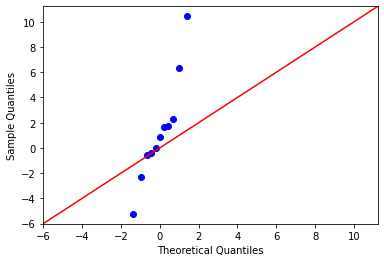

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.002301729517057538
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.00033169594461293286
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.8603097775041441
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.498
Data does not look normal (reject H0) 10.0 0.567
Data does not look normal (reject H0) 5.0 0.68
Data does not look normal (reject H0) 2.5 0.793
Data does not look normal (reject H0) 1.0 0.944


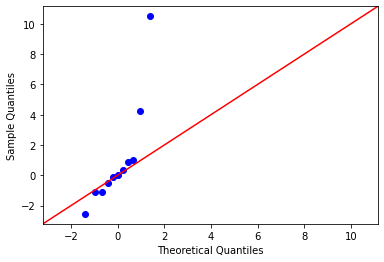

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.22174954414367676
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.19877559917695875
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.0006438494164700818
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.498
Data does not look normal (reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


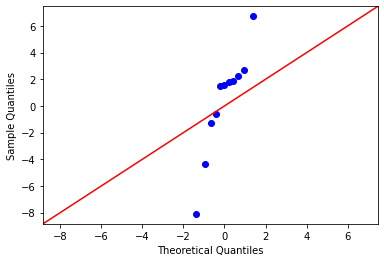

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.2373659610748291
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.035727126026534835
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.061550038531384375
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


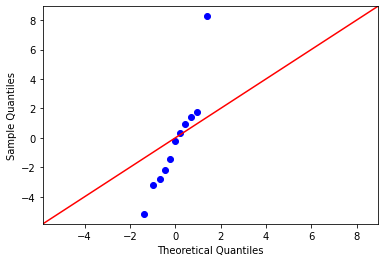

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.05682951956987381
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.036102197442575826
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.10187844701200484
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.498
Data does not look normal (reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


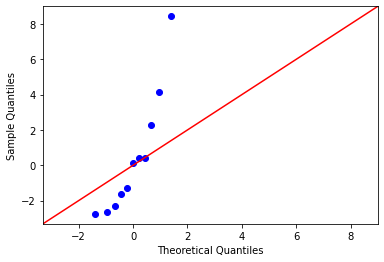

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.9797261953353882
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8697756934454755
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.006962659005088873
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


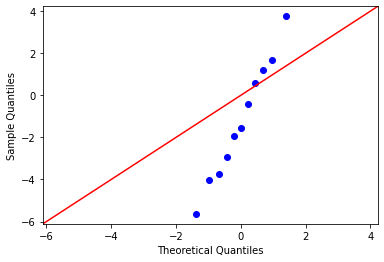

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.6349416375160217
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.6332013221383499
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.13582866985901446
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


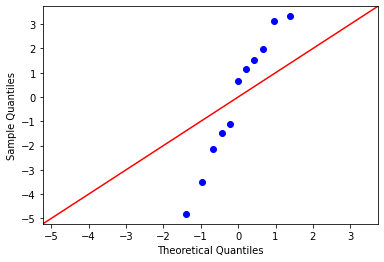

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.27718260884284973
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.308645683855213
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.10832061075124635
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


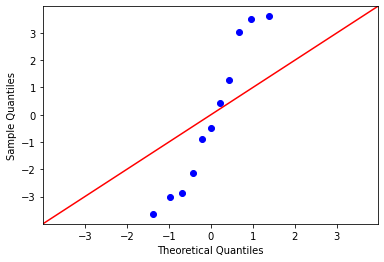

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.35095927119255066
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.45288120227269124
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.06808397137596545
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


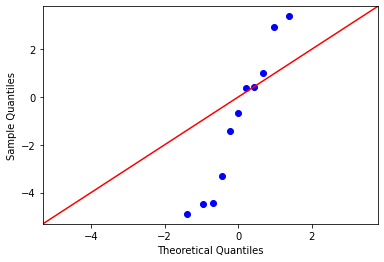

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.3540034294128418
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.18112750072757225
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.5516879029456787
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


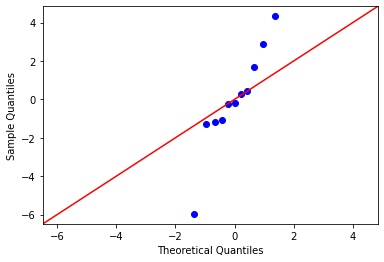

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.41871803998947144
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.553301268201149
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.07102936589234722
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


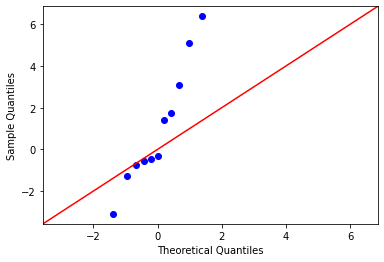

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.2705097198486328
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.595745080516136
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.011911284780588198
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


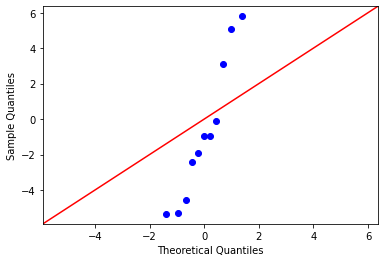

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.022464610636234283
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.32786832698282037
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.008163847408742235
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.498
Data does not look normal (reject H0) 10.0 0.567
Data does not look normal (reject H0) 5.0 0.68
Data does not look normal (reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


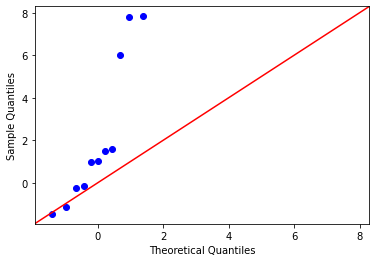

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8458165526390076
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.9103319131405562
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.002179623149668223
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


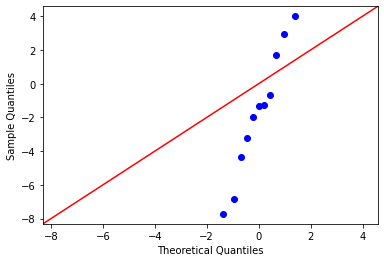

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8835327625274658
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.844766480669827
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.02759218520448042
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


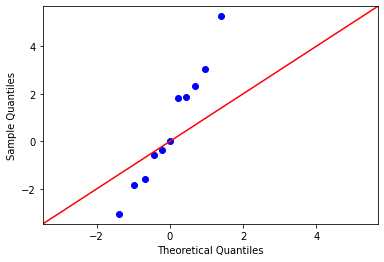

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8933503031730652
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.9195175298240329
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.11030067911780933
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


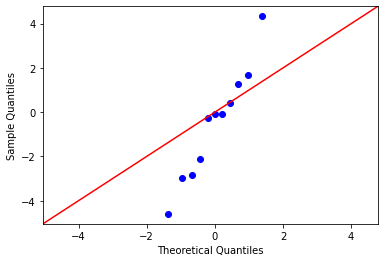

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.812379777431488
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8454291124500206
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.0026518600946498984
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


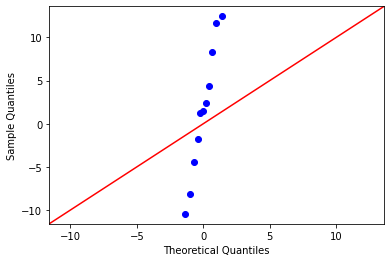

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.0030997709836810827
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.0001422467844333135
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.29511297876233533
----Anderson test-----
Data does not look normal (reject H0) 15.0 0.498
Data does not look normal (reject H0) 10.0 0.567
Data does not look normal (reject H0) 5.0 0.68
Data does not look normal (reject H0) 2.5 0.793
Data does not look normal (reject H0) 1.0 0.944


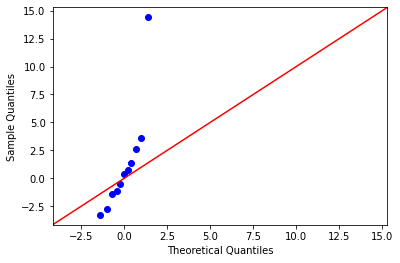

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.48524782061576843
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.5142845698066636
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.013525812967839604
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


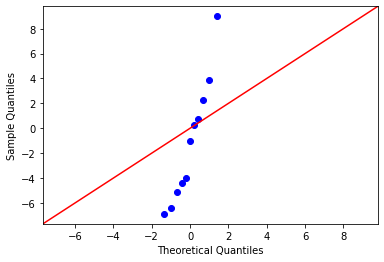

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.8845067620277405
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.9500116105673657
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.4197483240456627
----Anderson test-----
Data looks normal (fail to reject H0) 15.0 0.498
Data looks normal (fail to reject H0) 10.0 0.567
Data looks normal (fail to reject H0) 5.0 0.68
Data looks normal (fail to reject H0) 2.5 0.793
Data looks normal (fail to reject H0) 1.0 0.944


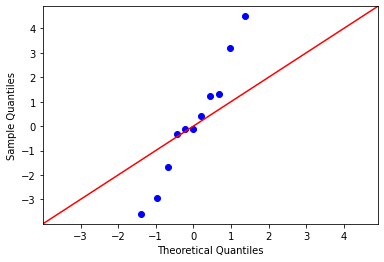

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Данные о доходности всех компаний распределены нормально


In [152]:
norm = []
for i in range(20):
    norm.append(is_normal(companies[i]))
print(norm)
if all(norm):
    print(f'Данные о доходности всех компаний распределены нормально')
else:
    print(f'Вероятно, нужно изменить объем выборки (сейчас с: {start_date})')

Проверив гипотезу о нормальном распределении доходностей акций, и подобрав период так, чтобы не было оснований отбросить её, мы можем теперь получить интервальные оценки интересующих нас активов.

In [127]:
laplas_table = pd.read_csv(laplas, sep=';')
q_table = pd.read_csv(q_url, sep=';')
def confidence_intervals(x, gamma=0.95):
    data = x['Profitability'][(comp.Date > start_date) & (comp.Date <= end_date)]
    s = data.std()
    m = data.mean()
    n = data.shape[0]
    temp = abs(laplas_table['F(x)'] - gamma/2)
    t = laplas_table[temp == temp.min()]['x'].iloc[0]
    precision = t * (s/n**(1/2))
    temp_q = abs(q_table['n']-n)
    q = q_table[temp_q == temp_q.min()][f'{gamma}'].iloc[0]
    return (round(m - precision, 4), round(m + precision, 4)), (round(s*(1-q), 4), round(s*(1+q), 4))

In [178]:
gamma = 0.95
print(f'Для уровня значимости: {gamma}')
profit = []
risk = []
for i in range(len(companies) - 1):
    m, s = confidence_intervals(companies[i], gamma=gamma)
    profit.append(m)
    risk.append(s)
ans = pd.DataFrame({'m': profit, 'risk': risk}, index=labels)
ans

Для уровня значимости: 0.95


,m,risk
АФК Система,"(-0.6773, 3.977)","(1.8509, 6.3752)"
РусАгро,"(-0.9408, 2.9133)","(1.5326, 5.279)"
Алроса,"(-1.8315, 2.4169)","(1.6894, 5.8192)"
Северсталь,"(-1.8556, 2.4372)","(1.7071, 5.88)"
Детский мир,"(-1.5766, 2.1623)","(1.4868, 5.1213)"
Х5 груп,"(-2.5383, 0.6877)","(1.2829, 4.4188)"
Газпром,"(-1.3726, 1.7895)","(1.2575, 4.3313)"
Лента,"(-1.555, 1.3462)","(1.1537, 3.9739)"
Магнит,"(-2.3927, 1.0688)","(1.3765, 4.7414)"
Московская биржа,"(-1.4019, 1.4655)","(1.1403, 3.9276)"


Отсортируем акции по убыванию ожидаемой доходности.

In [179]:
z = zip(companies, labels, range(len(labels)))
rating = dict()
for comp, lab, i in z:
    m_w = m_o[i] # Недельная доходность
    rating[lab] = m_w
res = sorted(rating, key=lambda x: rating[x], reverse=True)

In [130]:
def chosen(companies, res, cutting_edge=0.1):
    portfel = pd.DataFrame([])
    m = []
    for c in res:
        if rating[c] > cutting_edge:
            portfel[c] = companies[labels.index(c)]['Profitability']
            m.append([m_o[labels.index(c)]])
    return portfel, m

Мы выбрали следующие активы для инвестирования:

In [180]:
p = chosen(companies, res, -0.1)
pd.DataFrame(p[1], index=p[0].columns, columns=["Ожидаемая доходность"])

,Ожидаемая доходность
TCS Group,2.505103
ПИК,1.792821
АФК Система,1.649855
Яндекс,1.204054
РусАгро,0.986266
РосТелеКом,0.712873
Детский мир,0.292825
Алроса,0.292733
Северсталь,0.290781
Газпром,0.208482


In [ ]:
# def marcovic(m_0):
#     ch = chosen(companies, res)
#     V = ch[0].cov()
#     m_ = np.array(ch[1]).T
#     I = np.ones((len(ch[1]), 1))
#     a11 = np.dot(np.dot(I.T, np.linalg.inv(V)), I)
#     a12 = np.dot(np.dot(I.T, np.linalg.inv(V)), m_)
#     a22 = np.dot(np.dot(m_.T, np.linalg.inv(V)), m_)
#     d = np.dot(a11, a22) - np.dot(a12, a12)
#     b = np.linalg.inv(d) * (a22 * np.dot(np.linalg.inv(V), I) - a12 * np.dot(np.linalg.inv(V), m_))
#     c = np.linalg.inv(d) * (a11 * np.dot(np.linalg.inv(V), m_) - a22 * np.dot(np.linalg.inv(V), I))
#     return b + m_0 * c

In [ ]:
# def marcovic(m_0):
#     ch = chosen(companies, res)
#     V = ch[0].cov()
#     m_ = np.array(ch[1])
#     I = np.ones((len(ch[1]), 1))
#     V_ = np.linalg.inv(V)
#     a = (np.dot(V_, m_) * m_).sum()
#     b = (m_ * np.dot(V_, I)).sum()
#     c = (I * np.dot(V_, I)).sum()
#     v = np.dot(V_, (((c * m_0 - b)/(a*c-b**2)*m_) + (a - b * m_0)/(a * c - b**2)*I))
#     s_p = np.dot(np.dot(v.T, V), v)
#     return v, m_, s_p

In [ ]:
# v, m_, s_p = marcovic(0.5)
# # Получены эффективные веса для потртфеля рисковых акций
# v

В качестве безрискового актива возьмем процент на остаток на счете в банке Альфа-Банк (4% в год), который начисляется ежедневно и выплачивается в конце месяца

In [132]:
m_f = 4/365*5
m_f

0.0547945205479452

In [133]:
def tobin(m_p, m_f, ce=0.1):
    ch = chosen(companies, res, cutting_edge=ce)
    V = ch[0].cov()
    m_ = np.array(ch[1])
    I = np.ones((len(ch[1]), 1))
    V_ = np.linalg.inv(V)
    d2 = (np.dot(V_, (m_ - m_f * I)) * (m_ - m_f * I)).sum()
    v = (m_p - m_f) / d2 * np.dot(V_, (m_ - m_f * I))
    s_p = (m_p-m_f)/np.sqrt(d2)
    v_f = 1 - np.dot(I.T, v)
    return v, v_f, s_p, m_

In [181]:
ret = tobin(1.4, m_f, -0.1)
m_p = ret[1] * m_f + np.dot(ret[0].T, ret[3])

In [182]:
ind = list(x for x in res)
last = pd.DataFrame(ret[0], index=ind[:12], columns=['Доля'])

Ниже представлены параметры портфеля: ожидаемая доходность, риск и доля безрискового актива

In [183]:
m_p, ret[2], ret[1]

(array([[1.4]]), 2.0326944027775014, array([[0.66747497]]))

Структура рисковых активов в портфеле

In [184]:
money = C_0 * ret[0]
alpha = C_0 * ret[1]
money[money < 0].sum()
last['Сумма'] = money
last.sort_values("Доля", ascending=False)

,Доля,Сумма
ПИК,0.428716,477568.221262
TCS Group,0.179450,199898.658625
Яндекс,0.163155,181746.600898
Северсталь,0.100927,112427.521199
АФК Система,0.048329,53836.180354
РусАгро,-0.025044,-27897.609651
МВидео,-0.052589,-58581.129023
РосТелеКом,-0.053020,-59061.342952
Детский мир,-0.081472,-90756.080838
Московская биржа,-0.086540,-96400.664081


In [185]:
bank = last[last['Сумма'] < 0].sum()
bank

Доля         -0.588053
Сумма   -655061.221949
dtype: float64

In [186]:
# prices1 = np.array([[753.4, 3852.2, 826.6, 174.6, 108.5, 4823.4, 892, 34.97]])
# prices2 = np.array([[785, 3865, 840.9, 168.55, 108.19, 4867.6, 905.8, 34.97]])
# prices1 = np.array([[737.4, 4592.6, 3685.2, 768.2, 901.8]])
# prices2 = np.array([[750.8, 4960, 4335.4, 734.9, 917.2]])
prices1 = np.array([[716.7, 4256.6, 4944, 1421.4, 35.436]])
prices2 = np.array([[760.7, 4341, 4950.6, 1439, 34.854]])

In [195]:
C = C_0 * prices2 / prices1 @ ret[0][ret[0] > 0].reshape(-1, 1) + C_0 * (1 + m_f) * ret[1] + C_0 * ret[0][ret[0] < 0].sum()

In [197]:
C - 1000000

array([[176907.94398362]])

**Пересмотр портфеля 1**

In [ ]:
# # Первый пересмотр
# afks_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AFKS.ME_1.csv'
# agro_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AGRO.ME_1.csv'
# alrs_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/ALRS.ME_1.csv'
# chmf_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/CHMF.ME_1.csv'
# dsky_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/DSKY.ME_1.csv'
# fesh_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FESH.ME_1.csv'
# five_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FIVE.ME_1.csv'
# gazp_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/GAZP.ME_1.csv'
# lnta_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LNTA.ME_1.csv'
# mdmg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MDMG.ME_1.csv'
# mgnt_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MGNT.ME_1.csv'
# moex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MOEX.ME_1.csv'
# mvid_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MVID.ME_1.csv'
# nlmk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/NLMK.ME_1.csv'
# pikk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/PIKK.ME_1.csv'
# poly_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/POLY.ME_1.csv'
# rtkm_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/RTKM.ME_1.csv'
# sber_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/SBER.ME_1.csv'
# tcsg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TCSG.ME_1.csv'
# ttlk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TTLK.ME_1.csv'
# yndx_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/YNDX.ME_1.csv'
# imoex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/IMOEX.ME_1.csv'

In [ ]:
# второй пересмотр
afks_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AFKS.ME_2.csv'
agro_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AGRO.ME_2.csv'
alrs_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/ALRS.ME_2.csv'
chmf_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/CHMF.ME_2.csv'
dsky_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/DSKY.ME_2.csv'
fesh_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FESH.ME_2.csv'
five_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FIVE.ME_2.csv'
gazp_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/GAZP.ME_2.csv'
lnta_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LNTA.ME_2.csv'
mdmg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MDMG.ME_1.csv'
mgnt_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MGNT.ME_2.csv'
moex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MOEX.ME_2.csv'
mvid_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MVID.ME_2.csv'
nlmk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/NLMK.ME_2.csv'
pikk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/PIKK.ME_2.csv'
poly_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/POLY.ME_2.csv'
rtkm_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/RTKM.ME_2.csv'
sber_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/SBER.ME_2.csv'
tcsg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TCSG.ME_2.csv'
ttlk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TTLK.ME_2.csv'
yndx_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/YNDX.ME_2.csv'
imoex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/IMOEX.ME_2.csv'

In [ ]:
afks = pd.read_csv(afks_url)
agro = pd.read_csv(agro_url)
alrs = pd.read_csv(alrs_url)
chmf = pd.read_csv(chmf_url)
dsky = pd.read_csv(dsky_url)
five = pd.read_csv(five_url)
gazp = pd.read_csv(gazp_url)
lnta = pd.read_csv(lnta_url)
mgnt = pd.read_csv(mgnt_url)
moex = pd.read_csv(moex_url)
mvid = pd.read_csv(mvid_url)
nlmk = pd.read_csv(nlmk_url)
pikk = pd.read_csv(pikk_url)
poly = pd.read_csv(poly_url)
rtkm = pd.read_csv(rtkm_url)
sber = pd.read_csv(sber_url)
tcsg = pd.read_csv(tcsg_url)
ttlk = pd.read_csv(ttlk_url)
yndx = pd.read_csv(yndx_url)
imoex = pd.read_csv(imoex_url)

In [ ]:
imoex = imoex.fillna(1)

In [ ]:
start_date = pd.to_datetime("2020-11-25")
companies = [afks, agro, alrs, chmf, dsky, five, gazp, lnta, mgnt, moex, mvid, nlmk, pikk, poly, rtkm, sber, tcsg, ttlk, yndx, imoex]

In [ ]:
m_i = []
std_i = []
cov_i = []
beta_i = []
alpha_i = []
psi_i = []
for comp in companies:
    comp.Date = pd.to_datetime(comp.Date)
    comp['Profitability'] = 100 * (comp['Close'] - comp['Open'])/comp['Open']
    mi = comp['Profitability'][comp.Date > start_date].mean()
    m_i.append(mi)
    std_i.append(comp['Profitability'][comp.Date > start_date].std())
    covi = covariation(comp['Profitability'][comp.Date > start_date], ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])
    cov_i.append(covi)
    betai = covi/(std_i[-1] ** 2)
    beta_i.append(betai)
    alphai = mi - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date].mean()
    alpha_i.append(alphai)
    psii = ((comp['Profitability'][comp.Date > start_date] - alphai - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])**2).sum()/(comp.shape[0] - 2)
    psi_i.append(psii)

In [ ]:
m_o = []
s_o = []
for i in range(len(companies) - 1):
    m_o.append(alpha_i[i] + beta_i[i] * m_i[-1])
    s_o.append((beta_i[i]**2 * std_i[-1]**2 + psi_i[i])**(1/2))
ans = pd.DataFrame({'m': m_o, 'risk': s_o}, index=labels)
ans

In [ ]:
norm = []
for i in range(20):
    norm.append(is_normal(companies[i]))
if all(norm):
    print(f'Данные о доходности всех компаний распределены нормально')
else:
    print(f'Вероятно, нужно изменить объем выборки (сейчас с: {start_date})')
print(norm)

In [ ]:
gamma = 0.95
print(f'Для уровня значимости: {gamma}')
profit = []
risk = []
for i in range(len(companies) - 1):
    m, s = confidence_intervals(companies[i], gamma=gamma)
    profit.append(m)
    risk.append(s)
ans = pd.DataFrame({'m': profit, 'risk': risk}, index=labels)
ans

In [ ]:
z = zip(companies, labels, range(len(labels)))
rating = dict()
for comp, lab, i in z:
    m_w = (1 + m_o[i])**5 - 1 # Недельная доходность
    rating[lab] = m_o[i]
res = sorted(rating, key=lambda x: rating[x], reverse=True)
for c in res:
    print(f"{c}: {rating[c]}")

In [ ]:
p = chosen(companies, res, cutting_edge=0.006)
pd.DataFrame(p[1], index=p[0].columns, columns=["Ожидаемая доходность"])

In [ ]:
ret = tobin(0.25, m_f, ce=0.006)
m_p = ret[1] * m_f + np.dot(ret[0].T, ret[3])

In [ ]:
ind = list(x for x in res)
last = pd.DataFrame(ret[0], index=ind[:10], columns=['Доля'])

In [ ]:
# # Первый доход
# C_0 = 476539.229103/753.4*781.1 + 141730.506661/174.6*170.72 + 197297.952841/264*263.4 + 148278.390215/142.06*142.72 + 138214.714061/4823.4*4816 + 125963.798584/826.6*840.9 + 245798.2 * (1 + m_f)**5 - 23297.194123 - 91803.020902 - 135114.573556 - 223608.007763
# # Второй доход
C_0 = 618252.123865/737.4*750.8 + 310827.162773/226.65*234.35 + 159762.536753/4592.6*4960.4 + 126729.678045/137.22*140.08 + 104312.495566/253.6*259.2 + 91734.051259/797.7*734.9 + 97446.27 * (1 + m_f)**5 - 1030.688925 - 91436.323613 - 97358.827751 - 288892.863148

In [ ]:
C_0

In [ ]:
-(- 1030.688925 - 91436.323613 - 97358.827751 - 288892.863148)

In [ ]:
money = C_0 * ret[0]
alpha = C_0 * ret[1]
money[money < 0].sum()
last['Сумма'] = money
last.sort_values(by=['Доля'], ascending=False)

In [ ]:
m_p, ret[2], ret[1]

In [ ]:
ret[1] * C_0

In [ ]:
bank = last[last['Сумма'] < 0].sum()
bank